## CSCE 676 :: Data Mining and Analysis :: Texas A&M University :: Spring 2026


# Weekly Homework 3: Graphs!


***Goals of this homework:***
Perform an analysis of a graph of your choice.


***Submission instructions:***

You should post your notebook to Canvas (look for the assignment there). Please name your submission **your-uin_hw3.ipynb**, so for example, my submission would be something like **555001234_hw3.ipynb**. Your notebook should be fully executed when you submit ... so run all the cells for us so we can see the output, then submit that.

***Grading philosophy:***

We are grading reasoning, judgment, and clarity, not just correctness. Show us that you understand the data, the constraints, and the limits of your conclusions.

***For each question, you need to respond with 2 cells:***
1. **[A Code Cell] Your Code:**
  - If code is not applicable for the question, you can skip this cell.
  - For tests: tests can be simple assertions or checks (e.g., using `assert` or `print` or small functions or visual inspection); formal testing frameworks are not required.
2. **[A Markdown Cell] Your Answer:** Write up your answers and explain them in complete sentences. Include any videos in this section as well; for videos, upload them to your TAMU Google Drive, and ensure they are set to be visible by the instruction team (set to: **anyone with a TAMU email can view**), then share the link to the video in the cell.

***At the end of each Section (A/B/C/...) include a cell for your resources:***

**[A Markdown Cell] Your Resources:** You need to cite 3 types of resources and note how they helped you: (1) Collaborators, (2) Web Sources (e.g. StackOverflow), and (3) AI Tools (you must also describe how you prompted, but we do not require any links to any specific chats). Specifically, use the following format as a template:
```
On my honor, I declare the following resources:
1. Collaborators:
- Reveille A.: Helped me understand that a df in pandas is a data structure kinda like a CSV.
- Sully A.: Helped me fix a bug with the vector addition of 2 columns.
- ...

2. Web Sources:
- https://stackoverflow.com/questions/46562479/python-pandas-data-frame-creation: how to create a pd df
- ...

3. AI Tools:
- ChatGPT: I gave it the homework .ipynb file and the ufo.csv, and told it to generate the code for the first question, but it did it with csv.reader(), so I re-prompted it to use pandas and that one was correct
- ...
```
***Why do we require this cell?*** This cell is important...

1. For academic integrity, you must give credit where credit is due.

2. We want you to pay attention to how you can successfully get help to move through problems! Is there someone you work with or an AI tool that helps you learn the material better? That's great! The point of engineering is to use your tools to solve hard problems, and part of graduate school is learning about how *you* learn and solve problems best.

***A reminder: you get out of it what you put into it.***
Do your best on these homeworks, show us your creativity, and ask for help when you need it -- good luck!

# A [72pts]. Step-by-Step Data Mining & Experimental Analysis on A Graph of Your Choice

**Rubric**

[18 pts] Strong/Professional: Correct and complete implementation of the task; Reasonable assumptions, stated or implied, and justified; Thoughtful handling of real-world data issues (missingness, noise, scale, duplicates, edge cases); Clear, concise explanations of what was done and why; Code is clean, readable, and well-structured, uses appropriate pandas, and would plausibly pass a professional code review; Tests meaningfully validate non-trivial behavior (not just "the code runs so it must be right").

[9 pts] Partial/Developing: Core task mostly completed but with gaps, weak assumptions, or minor mistakes; Reasoning is shallow or mostly descriptive; Code works but is messy, repetitive, or fragile; Tests are superficial, incomplete, or poorly motivated.

[0 pts] Minimal/Incorrect: Task is largely incorrect, missing, or misunderstands the goal; Little to no reasoning or justification; Code does not run or ignores constraints; No meaningful tests.


## Overview
In this homework, you will **choose one dataset you like** from the [SNAP datasets](https://snap.stanford.edu/data/index.html) collection from the **Social networks** section. You must choose a  **directed graph only**. In this section, you will perform a step‑by‑step data mining & experimental analysis. *Much of this section is self-directed, meaning you will need to make critical decisions about what tools you use and what you explore.*

Ideally, you should eventually turn in a coherent story: **What you tried → Why → What you found → So what? → Wait...Anything more?**. It's completely OKAY if you only get minor discoveries. But you should always document the whole learning and reasoning process. Grading will be based on the logic and coherence of your submitted notebook.

As a guide, for each step of the homework, you should briefly document:
- **Method choice & rationale.** Why this method? What do you expect?
- **Parameters.** E.g., `alpha=0.85` for PageRank; seed selection for PPR; thresholds for community extraction.
- **Results.** Tables/plots + **1–3 sentences** of interpretation.
- **Reflection.** Did results match your expectations? If not, why might that be?

Ideally, strong submissions should read like a *short research memo* rather than a raw dump of numbers.

## Environment Setup
You may use **Python 3.9+**. Other possible tools are:
- **Graph tools**: You are welcome to use existing tools that are optimised for graph learning. Among them, `networkx`is recommended. `graph-tool` and `igraph` are also good when dealing with larger graphs.
- **Data processing packages**: eg. `numpy`, `pandas`
- **Plotting**: `matplotlib`, `plotly`, `seaborn` etc.
- **other related tools** `scipy`, `scikit-learn`,  `pytorch` etc.
- You may choose other tools; just be sure to let us know.

> If your chosen dataset is very large, consider using `graph-tool` and `igraph`, or sampling/induced subgraphs to stay within reasonable time/memory limits.


In [1]:
# Install libraries as needed (uncomment if running on a clean environment)
# %pip install networkx pandas numpy matplotlib scipy scikit-learn
# %pip install python-louvain igraph

import os, io, gzip, zipfile, tarfile, sys, math, random
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import urllib.request
import shutil
import igraph as ig
import csv
# For reproducibility
random.seed(42)
np.random.seed(42)

print(nx.__version__)

3.2.1


# 1. Choose a Dataset
Pick **one** dataset from SNAP's **Directed networks** (e.g.`ego-Twitter`, `wiki-Vote` samples, etc.). Paste the **download URL** and a brief description of why you chose it.

- **Dataset name:** _e.g., soc-Slashdot0811_
- **URL:** _direct link to .txt/.gz_
- **Why this dataset?** _1–3 sentences on interest & expected properties_

> ⚠️ Make sure it's **directed**.

Add this cite to your citation cell:
> Jure Leskovec and Andrej Krevl. SNAP Datasets: Stanford Large Network Dataset Collection. http://snap.stanford.edu/data.

In [2]:
# === You may using the follow method to download datasets if you like ===
DATA_URL = "https://snap.stanford.edu/data/soc-Epinions1.txt.gz"  # Example; replace with your chosen dataset
LOCAL_PATH = "../data/raw_graph.txt.gz"
#NO ASSUMPTIONS MADE
def download_dataset(url: str, to_path: str):
    import urllib.request
    print(f"Downloading from {url} ...")
    urllib.request.urlretrieve(url, to_path)
    size = os.path.getsize(to_path) / (1024*1024)
    print(f"Saved to {to_path} ({size:.2f} MB)")

# Uncomment to download when ready
download_dataset(DATA_URL, LOCAL_PATH)
#TESTS
import os
import re
import gzip
import pytest

def _write_dummy_gz(path: str, size_bytes: int = 1024) -> None:
    """Create a gz file of approximately size_bytes (uncompressed isn't important here)."""
    # We'll just write enough bytes into a gzip file to ensure os.path.getsize works.
    payload = b"a" * size_bytes
    with gzip.open(path, "wb") as f:
        f.write(payload)


import tempfile

def test_basic_download_mock():
    with tempfile.NamedTemporaryFile() as f:
        path = f.name

        def fake_urlretrieve(url, to_path):
            with open(to_path, "wb") as out:
                out.write(b"12345")

        urllib.request.urlretrieve = fake_urlretrieve

        download_dataset("http://fake.com", path)

        assert os.path.exists(path)
        assert os.path.getsize(path) > 0

test_basic_download_mock()
print("Test passed!")

Saved to ../data/raw_graph.txt.gz (1.55 MB)
Saved to /tmp/tmpnml8p6hx (0.00 MB)
Test passed!


- **Dataset name:** Epinions Social Network
- **URL:** https://snap.stanford.edu/data/soc-Epinions1.txt.gz
- **Why this dataset?** I chose this dataset because it is reasonably sized (it can fit in main memory) and it is a directed graph. It will also be pretty easy to interpret the results of pagerank since each edge (a, b) means a trusts b. Thus, page rank in this graph simply implies that a given user is trustworthy: someone who is trusted by other people, who are themselves trusted, will have a high page rank.  

# 2. Load & Parse the Directed Graph
First choose a graph tool and write a few lines of why you choose it and how you are going to use it. If you are not using any tools, please also document that.

> SNAP directed edge lists are usually in the form `src\t dst` per line, with comments starting with `#`.

Implement a robust loader that:
- Skips comment lines (if there is any)
- Builds a **`networkx.DiGraph`** (if you choose networkx)
- (Optional) Restricts to the **largest weakly connected component (WCC)** for clarity

Write your loading graph code here:

In [3]:
#NO ASSUMPTIONS MADE
def print_node_info(title, nodes, max_n=10):
    print(f"\n{title} (showing up to {min(len(nodes), max_n)}):")
    if not nodes:
        print("  (none)")
        return

    for i in nodes[:max_n]:
        print(
            f"  user={sub.vs['name'][i]} "
            f"| v={i:>4} "
            f"| PR={pr_sub[i]:.6g} "
            f"| deg={total_deg[i]:>4} "
            f"(in={indeg[i]:>4}, out={outdeg[i]:>4})"
        )

def gunzip_file(file_path):
    """
    Decompress a .gz file into the same directory.

    Parameters
    ----------
    file_path : str
        Path to the .gz file

    Returns
    -------
    output_path : str
        Path to the decompressed file
    """

    # Make sure the file ends in .gz
    if not file_path.endswith(".gz"):
        raise ValueError("Input file must end with .gz")

    # Output path = remove .gz extension
    output_path = file_path[:-3]

    print(f"Decompressing {file_path} ...")

    # Open compressed file and write decompressed version
    with gzip.open(file_path, "rb") as f_in:
        with open(output_path, "wb") as f_out:
            shutil.copyfileobj(f_in, f_out)

    print(f"Saved decompressed file to {output_path}")
    return output_path

RAW_GRAPH_PATH = gunzip_file(LOCAL_PATH)
    


def load_directed_graph(file_path, separator: str = " ") -> ig.Graph:
    """Load a directed edge list into a igraph.Graph.
    Assumes lines like: u<sep>v, with comment lines starting by `comment`.
    If sep is None, split on whitespace.
    """
    
    """
    Notably, the igraph library has a lot of functionality, however reading a graph from a csv is not apart of that functionality.
    igraph.Graph constructor: __init__(n=0, edges=None, directed=False, graph_attrs=None, vertex_attrs=None, edge_attrs=None)
    igraph.Edge constructor: 
    """
    node2id = {}
    edges = []
    def get_id(label: str) -> int:
        if label not in node2id:
            node2id[label] = len(node2id)
        return node2id[label]

    with open(file_path, "rt") as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith("#"):
                continue

            if separator is None:
                parts = line.split()
            else:
                parts = line.split(separator)

            # Some datasets may have extra columns; only take first two
            if len(parts) < 2:
                continue

            u, v = parts[0], parts[1]
            edges.append((get_id(u), get_id(v)))

    graph = ig.Graph(n=len(node2id), edges=edges, directed=True)
    # Store original labels so you can map back later
    graph.vs["name"] = [None] * len(node2id)
    for label, idx in node2id.items():
        graph.vs[idx]["name"] = label

    return graph

raw_epinion_graph = load_directed_graph(RAW_GRAPH_PATH, separator="\t")
print("Loaded the raw epinion graph which has ", raw_epinion_graph.ecount(), " edges and ", raw_epinion_graph.vcount(), " vertices")
#TESTS
def test_gunzip():
    import tempfile

    # Create dummy gz file
    tmp_dir = tempfile.mkdtemp()
    gz_file = os.path.join(tmp_dir, "test.txt.gz")

    with gzip.open(gz_file, "wb") as f:
        f.write(b"hello world")

    # Run gunzip
    out_file = gunzip_file(gz_file)

    # Check contents
    with open(out_file, "rb") as f:
        assert f.read() == b"hello world"

    print("gunzip_file test passed!")


def test_load_directed_graph_basic():
    # Create a temporary edge list file
    content = """# This is a comment
    1 2
    2 3
    
    # Another comment
    3 1
    """

    with tempfile.NamedTemporaryFile(mode="w+", delete=False) as f:
        f.write(content)
        path = f.name

    # Load graph
    G = load_directed_graph(path)

    # Assertions
    assert G.is_directed(), "Graph should be directed"
    assert G.vcount() == 3, f"Expected 3 vertices, got {G.vcount()}"
    assert G.ecount() == 3, f"Expected 3 edges, got {G.ecount()}"

    # Check vertex names exist
    assert set(G.vs["name"]) == {"1", "2", "3"}

    print("✅ test_load_directed_graph_basic passed!")

def test_load_directed_graph_csv_separator():
    content = """A,B
B,C
C,A
"""

    with tempfile.NamedTemporaryFile(mode="w+", delete=False) as f:
        f.write(content)
        path = f.name

    # Load graph with comma separator
    G = load_directed_graph(path, separator=",")

    assert G.is_directed()
    assert G.vcount() == 3
    assert G.ecount() == 3

    assert set(G.vs["name"]) == {"A", "B", "C"}

    print("✅ test_load_directed_graph_csv_separator passed!")

test_load_directed_graph_csv_separator()
test_load_directed_graph_basic()
test_gunzip()

Decompressing ../data/raw_graph.txt.gz ...
Saved decompressed file to ../data/raw_graph.txt
Loaded the raw epinion graph which has  508837  edges and  75879  vertices
✅ test_load_directed_graph_csv_separator passed!
✅ test_load_directed_graph_basic passed!
Decompressing /tmp/tmp9qao51qp/test.txt.gz ...
Saved decompressed file to /tmp/tmp9qao51qp/test.txt
gunzip_file test passed!


I am choosing to use the igraph tool for graphs because it has some very useful built in analysis functions such as betweeness(), closeness(), and even pagerank(). I'm going to use this tool for analysis as well as visualization since the library also provides visualization functions.

# 3. First Look: Basic Structural Statistics
Compute and report at least:
- `|V|` (nodes), `|E|` (edges)
- **Average in/out degree**, **degree distributions** (plot)
- **#SCCs**, size of **largest SCC** and **largest WCC**
- *(Optional): **Density**, **reciprocity***

Add a few sentences interpreting what these numbers suggest about your network.


In [5]:
#NO ASSUMPTIONS MADE
print("got here")

def basic_stats(graph: ig.Graph) -> pd.DataFrame:
    print("got to basic stats")
    """
    Compute basic directed-graph statistics and return them
    as a one-row pandas DataFrame.

    Stats included:
      - size and sparsity
      - connectivity structure
      - degree statistics
      - reciprocity
      - path-based reachability (WCC giant only)
    """

    # --- Basic size ---
    n = graph.vcount()
    m = graph.ecount()

    # --- Connected components ---
    print("got to connected components")
    scc = graph.components(mode="STRONG")
    wcc = graph.components(mode="WEAK")

    num_scc = len(scc)
    largest_scc = max((len(c) for c in scc), default=0)

    num_wcc = len(wcc)
    largest_wcc = max((len(c) for c in wcc), default=0)

    frac_in_largest_wcc = largest_wcc / n if n > 0 else 0.0

    # --- Density ---
    density = graph.density(loops=False)

    # --- Reciprocity ---
    print("got to reciprocity")
    reciprocity = graph.reciprocity()

    # --- Degree statistics ---
    print("got to degree statistics")
    indeg = graph.indegree()
    outdeg = graph.outdegree()
    total_deg = graph.degree(mode="ALL")

    avg_indeg = np.mean(indeg) if indeg else 0.0
    avg_outdeg = np.mean(outdeg) if outdeg else 0.0
    max_indeg = max(indeg, default=0)
    max_outdeg = max(outdeg, default=0)

    # Heavy-tail / hub indicator
    print("got to heavy tail")
    deg_gini = np.nan
    if n > 0:
        sorted_deg = np.sort(total_deg)
        cumdeg = np.cumsum(sorted_deg)
        deg_gini = (
            (n + 1 - 2 * np.sum(cumdeg) / cumdeg[-1]) / n
            if cumdeg[-1] > 0 else 0.0
        )


    # --- Return as DataFrame ---
    stats = {
        "num_vertices": n,
        "num_edges": m,
        "density": density,

        "num_scc": num_scc,
        "largest_scc": largest_scc,

        "num_wcc": num_wcc,
        "largest_wcc": largest_wcc,
        "frac_in_largest_wcc": frac_in_largest_wcc,

        "reciprocity": reciprocity,

        "avg_indegree": avg_indeg,
        "avg_outdegree": avg_outdeg,
        "max_indegree": max_indeg,
        "max_outdegree": max_outdeg,

        "degree_gini": deg_gini,


    }

    return pd.DataFrame([stats])

    
    

# Example after loading:
epinion_stats = basic_stats(raw_epinion_graph)
print("EPINION STATS")
display(epinion_stats)


#TESTS
def test_basic_stats():
    # Create a small directed graph
    # 0 -> 1 -> 2 -> 0 forms one SCC of size 3
    # 3 -> 4 is a separate weak component
    edges = [(0, 1), (1, 2), (2, 0), (3, 4)]
    G = ig.Graph(edges=edges, directed=True)

    df = basic_stats(G)

    assert df["num_vertices"][0] == 5
    assert df["num_edges"][0] == 4

    assert df["num_scc"][0] == 3
    assert df["largest_scc"][0] == 3

    assert df["num_wcc"][0] == 2
    assert df["largest_wcc"][0] == 3
    assert abs(df["frac_in_largest_wcc"][0] - 0.6) < 1e-6

    assert df["avg_outdegree"][0] > 0
    assert df["max_outdegree"][0] >= df["avg_outdegree"][0]

    print("✅ test_basic_stats passed!")

test_basic_stats()

got here
got to basic stats
got to connected components
got to reciprocity
got to degree statistics
got to heavy tail
EPINION STATS


,num_vertices,num_edges,density,num_scc,largest_scc,num_wcc,largest_wcc,frac_in_largest_wcc,reciprocity,avg_indegree,avg_outdegree,max_indegree,max_outdegree,degree_gini
0,75879,508837,0.000088,42176,32223,2,75877,0.999974,0.405226,6.7059,6.7059,3035,1801,0.814342


got to basic stats
got to connected components
got to reciprocity
got to degree statistics
got to heavy tail
✅ test_basic_stats passed!


From the above we see that we have a relatively sparse graph since the total number of edges is much less than the total possible number of edges given the number of vertices.  
Namely, there are $$75879 \cdot 75878 \approx 5.7 \cdot 10^9$$ possible edges however there are only $$5 \cdot 10^5$$ actual edges in this graph.  
We can also see that almost all users are contained in one weakly connected component (there are 75877 / 75879 users in the largest wcc), indicating that each user in the dataset is connected to another user (via trust relation) in some way.  
We can also see that despite the large number of strongly connected components, the largest scc accounts for 40% of all users. A strongly connected component in this graph is somewhat easy to interpret: every user in a strongly connected component indirectly trusts every other user in the strongly connected component, and every other user also indirectly trusts this user. 


# 4. Quick Visualization (Exploratory)
Produce a small subgraph visualization to build intuition (e.g., induced subgraph of top-`k` PageRank nodes or a random 500-node sample). For large graphs, you **don't have to** try to plot everything.

- Annotate what you observe (hubs? communities? sources/sinks?)


Building subgraph...
Top-75 PageRank induced subgraph selected.
Subgraph size: |V|=75, |E|=1894

Top hubs by total degree (showing up to 5):
  v=  31 | PR=0.025717 | deg=  93 (in=  50, out=  43)
  v=   3 | PR=0.0132015 | deg=  81 (in=  27, out=  54)
  v=   9 | PR=0.00931006 | deg=  80 (in=  20, out=  60)
  v=  46 | PR=0.0206319 | deg=  74 (in=  39, out=  35)
  v=  11 | PR=0.019853 | deg=  72 (in=  37, out=  35)

Top nodes by PageRank (within subgraph) (showing up to 10):
  v=  31 | PR=0.025717 | deg=  93 (in=  50, out=  43)
  v=  46 | PR=0.0206319 | deg=  74 (in=  39, out=  35)
  v=  39 | PR=0.0204287 | deg=  71 (in=  40, out=  31)
  v=  56 | PR=0.0199631 | deg=  62 (in=  39, out=  23)
  v=  11 | PR=0.019853 | deg=  72 (in=  37, out=  35)
  v=  16 | PR=0.018828 | deg=  56 (in=  35, out=  21)
  v=  27 | PR=0.0182131 | deg=  65 (in=  37, out=  28)
  v=  61 | PR=0.0181376 | deg=  51 (in=  30, out=  21)
  v=   8 | PR=0.0180835 | deg=  65 (in=  36, out=  29)
  v=  62 | PR=0.0180324 | deg=  

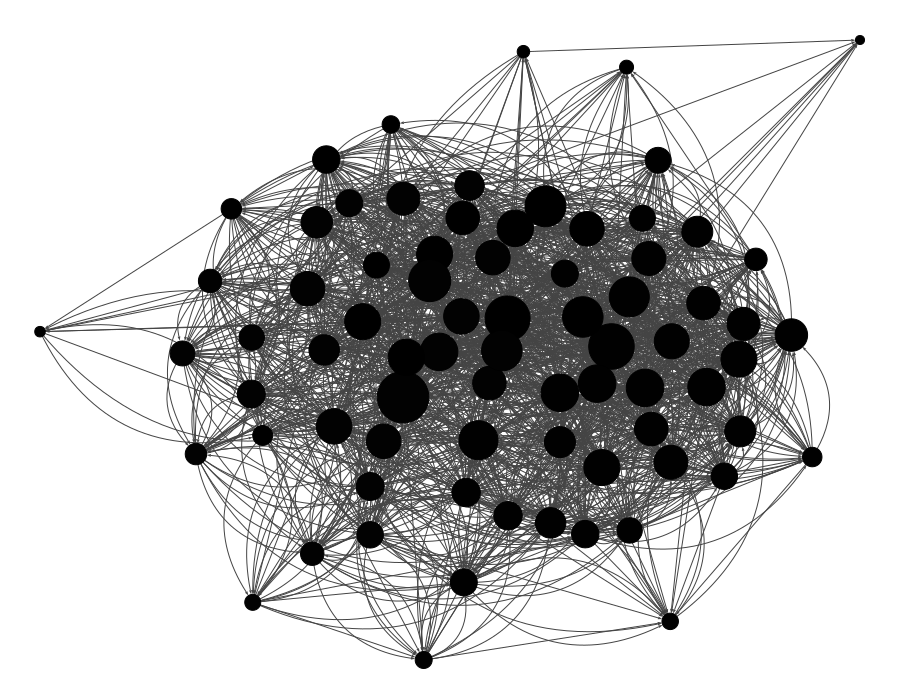

In [6]:
import igraph as ig
import random
from IPython.display import display

%matplotlib inline

def visualize_subgraph(
    graph: ig.Graph,
    mode: str = "pagerank",   # "pagerank" or "random"
    k: int = 75,              # top-k PageRank nodes (when mode="pagerank")
    sample_n: int = 75879,    # random sample size (when mode="random")
    top_print: int = 10       # how many "important nodes" to print per category
):
    """
    Build and plot a small subgraph for intuition.

    Options:
    - mode="pagerank": induced subgraph of top-k PageRank nodes
    - mode="random": induced subgraph of random sample_n nodes

    Prints annotations: hubs, communities, sources, sinks, top PageRank nodes.
    """

    print("Building subgraph...")

    # ------------------------------------------------------------
    # 1. Select nodes
    # ------------------------------------------------------------
    if mode == "pagerank":
        pr_full = graph.pagerank()
        top_nodes = sorted(range(graph.vcount()), key=lambda i: pr_full[i], reverse=True)[:k]
        sub = graph.induced_subgraph(top_nodes)
        print(f"Top-{k} PageRank induced subgraph selected.")

    elif mode == "random":
        nodes = random.sample(range(graph.vcount()), sample_n)
        sub = graph.induced_subgraph(nodes)
        print(f"Random {sample_n}-node induced subgraph selected.")

    else:
        raise ValueError("mode must be 'pagerank' or 'random'")


    print(f"Subgraph size: |V|={sub.vcount()}, |E|={sub.ecount()}")

    # ------------------------------------------------------------
    # 2. Diagnostics for annotation
    # ------------------------------------------------------------
    indeg = sub.indegree()
    outdeg = sub.outdegree()
    total_deg = [indeg[i] + outdeg[i] for i in range(sub.vcount())]

    # PageRank inside subgraph (use directed PR by default)
    pr_sub = sub.pagerank()

    def print_node_table(title, nodes, max_n=top_print):
        """Pretty printer for a list of vertex indices in `sub`."""
        nodes = list(nodes)[:max_n]
        print(f"\n{title} (showing up to {len(nodes)}):")
        if len(nodes) == 0:
            print("  (none)")
            return
        for v in nodes:
            print(
                f"  v={v:>4} | PR={pr_sub[v]:.6g} | deg={total_deg[v]:>4} "
                f"(in={indeg[v]:>4}, out={outdeg[v]:>4})"
            )

    # ------------------------------------------------------------
    # Biggest hubs (highest degree)
    # ------------------------------------------------------------
    hub_nodes = sorted(range(sub.vcount()), key=lambda i: total_deg[i], reverse=True)
    print_node_table("Top hubs by total degree", hub_nodes, max_n=5)

    # ------------------------------------------------------------
    # Top PageRank nodes (within the subgraph)
    # ------------------------------------------------------------
    top_pr_nodes = sorted(range(sub.vcount()), key=lambda i: pr_sub[i], reverse=True)
    print_node_table("Top nodes by PageRank (within subgraph)", top_pr_nodes, max_n=top_print)

    # ------------------------------------------------------------
    # Sources and sinks + "important" ones among them
    # ------------------------------------------------------------
    sources = [i for i in range(sub.vcount()) if indeg[i] == 0 and outdeg[i] > 0]
    sinks   = [i for i in range(sub.vcount()) if outdeg[i] == 0 and indeg[i] > 0]

    print(f"\nSources (indeg=0, outdeg>0): {len(sources)}")
    print(f"Sinks   (outdeg=0, indeg>0): {len(sinks)}")

    # Rank sources/sinks by PR first, then by degree (helps identify "important" ones)
    sources_sorted = sorted(sources, key=lambda i: (pr_sub[i], total_deg[i]), reverse=True)
    sinks_sorted   = sorted(sinks,   key=lambda i: (pr_sub[i], total_deg[i]), reverse=True)

    print_node_table("Most important SOURCES (ranked by PR then degree)", sources_sorted, max_n=min(top_print, 10))
    print_node_table("Most important SINKS (ranked by PR then degree)", sinks_sorted, max_n=min(top_print, 10))

    # ------------------------------------------------------------
    # Communities (modularity clustering on undirected view)
    # ------------------------------------------------------------
    clustering = sub.as_undirected().community_multilevel()
    print("\nCommunity structure:")
    print(f"  Number of communities: {len(clustering)}")
    print("  Largest community sizes:", sorted(clustering.sizes(), reverse=True)[:5])

    # ------------------------------------------------------------
    # 3. Plot styling
    # ------------------------------------------------------------
    sub.vs["size"] = [5 + 0.5 * d for d in total_deg]
    sub.vs["color"] = clustering.membership

    layout = sub.layout("fr")

    print("\nPlotting...")
    p = ig.plot(
        sub,
        layout=layout,
        vertex_label=None,
        edge_arrow_size=0.3,
        bbox=(900, 700),
        margin=40
    )

    # In notebooks: force display
    try:
        display(p)
    except Exception:
        pass

    return sub
import igraph as ig
import random



sub = visualize_subgraph(raw_epinion_graph)


###### test cases
def make_small_test_graph(n=30, m=120, seed=0):
    random.seed(seed)
    g = ig.Graph(n=n, directed=True)
    edges = set()
    while len(edges) < m:
        a = random.randrange(n)
        b = random.randrange(n)
        if a != b:
            edges.add((a, b))
    g.add_edges(list(edges))
    return g

def test_invalid_mode_raises():
    print("TEST: invalid mode raises ValueError")
    g = make_small_test_graph()
    try:
        _ = visualize_subgraph(g, mode="not-a-mode")
        assert False, "Expected ValueError but function returned normally"
    except ValueError:
        print("  PASS")

def test_pagerank_mode_basic():
    print("TEST: pagerank mode returns Graph + sets attrs")
    g = make_small_test_graph(n=40, m=150, seed=1)
    sub = visualize_subgraph(g, mode="pagerank", k=15, top_print=3)

    assert isinstance(sub, ig.Graph), "Return value is not an igraph.Graph"
    assert sub.is_directed(), "Subgraph should be directed"
    assert 1 <= sub.vcount() <= 15, f"Expected 1..15 vertices after giant WCC, got {sub.vcount()}"
    assert sub.ecount() >= 0, "Edge count should be non-negative"

    # giant WCC means exactly one weak component
    assert len(sub.components(mode="WEAK")) == 1, "Expected exactly one weakly connected component"

    # attributes used for plotting should exist and match vcount
    assert "size" in sub.vs.attributes(), "Missing vertex attribute 'size'"
    assert "color" in sub.vs.attributes(), "Missing vertex attribute 'color'"
    assert len(sub.vs["size"]) == sub.vcount(), "size attribute length mismatch"
    assert len(sub.vs["color"]) == sub.vcount(), "color attribute length mismatch"

    print(f"  PASS (v={sub.vcount()}, e={sub.ecount()})")

def test_random_mode_basic():
    print("TEST: random mode respects sample_n + sets attrs")
    g = make_small_test_graph(n=60, m=220, seed=2)

    random.seed(123)  # make sampling deterministic
    sub = visualize_subgraph(g, mode="random", sample_n=20, top_print=3)

    assert isinstance(sub, ig.Graph), "Return value is not an igraph.Graph"
    assert sub.is_directed(), "Subgraph should be directed"
    assert 1 <= sub.vcount() <= 20, f"Expected 1..20 vertices after giant WCC, got {sub.vcount()}"
    assert len(sub.components(mode="WEAK")) == 1, "Expected exactly one weakly connected component"

    assert "size" in sub.vs.attributes(), "Missing vertex attribute 'size'"
    assert "color" in sub.vs.attributes(), "Missing vertex attribute 'color'"
    assert len(sub.vs["size"]) == sub.vcount(), "size attribute length mismatch"
    assert len(sub.vs["color"]) == sub.vcount(), "color attribute length mismatch"

    print(f"  PASS (v={sub.vcount()}, e={sub.ecount()})")

def test_sample_n_too_big():
    print("TEST: random mode with sample_n > vcount raises ValueError (expected)")
    g = make_small_test_graph(n=10, m=20, seed=3)
    try:
        _ = visualize_subgraph(g, mode="random", sample_n=9999)
        assert False, "Expected ValueError from random.sample when sample_n > vcount"
    except ValueError:
        print("  PASS")

def run_all_tests():
    test_invalid_mode_raises()
    test_pagerank_mode_basic()
    test_random_mode_basic()
    test_sample_n_too_big()
    print("\nALL TESTS PASSED ✅")

run_all_tests()


From the visualization, we can see there are several large clusters of nodes in the middle that make up communities and hubs.  
Overall the graph appears quite dense, however you have to account for the fact that we are visualizing the induced subgraph of only the top 75 page rank vertices. It would be expected that the top 75 page rank vertices are surrounded by dense subgraphs since page rank is somewhat influenced by the in and out degrees of a vertex.  
We can also see sinks on the outskirst of the graph. It's likely that these nodes have such a high page rank because they are being trusted by some of the core hubs. We can see that closer to the center of the graph the out degree increases resulting in sources. Notably we don't have any true sources in this graph (none of the nodes in the graph have in-degree = 0, which makes sense since that would result in a page rank of 0), but we do get hubs that are connected to nearly every other vertex in this subgraph. For instance, vertex 9 has out edges to 60 of the 75 vertices in the subgraph.

# 5.

Prepare a concise research brief summarizing your data mining results and their significance.

Your write-up must include:

1. Results
- Clearly and precisely report your empirical findings.
- Include relevant quantitative results (e.g., metrics, comparisons, trends, error analysis).
- Figures or tables may be used if they improve clarity, but they must be referenced and interpreted in the text.
- You can use markdown formatting (bold, italics, headings, etc.) to help you communicate your findings.
- Do not focus on implementation details unless they are necessary to understand the results.

2. Significance and Interpretation
- Explain why the results matter in a data mining context.
- Discuss what the findings imply about the data, the model(s), or the assumptions made.
- Address limitations, tradeoffs, or unexpected outcomes where relevant.

Clearly state what new insight is gained from your results.
Aim for 5-7 paragraphs in length.

# Results
We processed the Epinions graph which models trust between users, i.e each edge (A, B) in the graph means that user A trusts user B. We found that this graph is quite sparse overall, with each user only trusting about 7 other users on average. Despite this sparsity, the largest strongly connected component has 32,223 of the 75,879 users. This is surprising since sparse graphs generally don't have large strongly connected components like this.  

We also found that there are several nodes with very large degree. Namely, the node with maximum in-degree has an in-degree of 3,035. The node with the maximum out-degree has an out-degree of 1,801. There is also a pretty high reciprocity score of 0.40.

By visualizing the graph we were able to see that many of the high page rank nodes form a densely connected graph. This visualization also accentuates the fact that there is a large central core of high page rank nodes that trust one another.

# Significance and Interpretation
The discrepancy between the low density and the large strongly connected components strongly implies that users are likely to trust someone who already trusts them. Although this is assuming there aren't any malicious users, which there might have been. Specifically, we also saw a couple of users with very large in-degrees and out-degrees. This isn't definitive evidence that these outliers are malicious users, but there is a possibility these users were gaming the system by using bots to trust their profiles.  

The visualization of the graph reinforces our hypothesis that users are likely to trust users that trust them. The induced subgraph of the 75 nodes with the highest page rank is very dense, meaning that each user is very likely to trust every other user indirectly. The high reciprocity score also helps this hypothesis since, if you pick a random edge A -> B, 40% of the time (in this graph) there is an edge B -> A.



```
On my honor, I declare the following resources:
1. Collaborators:
- 

2. Web Sources:
- Jure Leskovec and Andrej Krevl. SNAP Datasets: Stanford Large Network Dataset Collection. http://snap.stanford.edu/data. (used for searching for relevant datasets)
- https://snap.stanford.edu/data/soc-Epinions1.txt.gz - dataset used for analysis
- https://python.igraph.org/en/stable/ - documentation for igraph, used to find out how to use igraph (igraph API docs)

3. AI Tools:
- ChatGPT: Wrote the test cases for part 1, the generated code worked, i did not have to change it. 
- ChatGPT: Wrote the test cases for part 2, the generated code worked, and i did not have to change it. Also wrote the gunzip function, for which it also provided functional code. Also generated the vast majority of the load_directed_graph function, I just provided it with which parameters the function should accept and a high level overview of what the function should do.
- ChatGPT: Wrote the test cases for part 3, the generated code worked, and i did not have to change it. For the basic stats function, I just gave it the parameters and expected behavior and it filled in the rest, didn't have to modify the code.
- ChatGPT: For part 4, I had to prompt chatgpt a couple of times to produce compilable code. Initially, it was trying to call induced_subgraph on a Graph object, which doesn't make any sense, induced_subgraph has to be called on a set of vertices. ChatGPT also wrote the test cases for part 4.
```

# B [24pts]. Interview Questions

We now pretend this is a real job interview. Here's some guidance on how to answer these questions:

1. Briefly restate the question and state any assumptions you are making.

2. Explain your reasoning out loud, focusing on tradeoffs, limitations, and constraints.

3. As a principle, keep your answers as short and clear as they can be (while still answering the question).

4. Write/speak in a conversational but professional tone (avoid being overly formal). For speaking: speak at a reasonable pace and volume, speak clearly, pause when you need to, and practice making "eye contact" with the camera. Keep a confident, positive, and professional tone. *For additional coaching and practice, the University Writing Center provides individual appointments: https://writingcenter.tamu.edu/make-an-appointment.*

There may not be a single correct answer. We are grading whether your reasoning is reasonable and aware of limitations.


**Rubric**

[8pt] Clear understanding of the question; reasonable assumptions; thoughtful reasoning that acknowledges tradeoffs and limitations; clear, concise communication in a conversational but professional tone (for speaking: clear pace, volume, and articulation).

[4pt] Basic understanding but shallow reasoning or unclear assumptions; communication is somewhat unclear, overly verbose, or overly informal/formal.

[0pt] Minimal, unclear, or incorrect response; poor communication or unprofessional tone.

# 1.
Many real systems can be represented as graphs in multiple ways. How would you decide what the nodes and edges should represent in a given domain, and what kinds of errors can arise from a poor abstraction?

Of course this will vary greatly depending on what domain you are talking about, so I will make my answer as general as possible. So, speaking generally, you should start by figuring out possible candidates for nodes. This is more art than science as there are many choices, and there isn't an algorithm for determining what the best answer is. A node could be anything, from a person to a molecule to a point in time. Once you have chosen a definition of a node, you should try to look at how these nodes are connected. Are there any relationships between these nodes? You can then use these relationships to define the edges between your nodes.  
Having a poor abstraction, i.e choosing poor definitions for nodes and edges, will result in misleading or useless analysis. For instance, if your goal is to find tennis players with similar playing styles and you use players as nodes and connect them if they use the same brand of tennis racket, you aren't going to get useful information. You will only find out which players use the same brand of racket. 

# 2.
Discuss how missing edges, spurious edges, or sampling bias affect centrality-based conclusions. Which measures are most fragile?

# 3.
As a video (reminder to keep it brief, 2 minutes max): So, I see you did a graph analysis (referring to this homework). That's cool -- can you walk me through what you did?

# C [4pts]. What new questions do you have?
We want you to think bigger! Tell us what questions and curiosity this homework brings up for you.

**Rubric**

[4pt] Complete, thoughtful response.

[2pt] Partial response.

[0pt] Minimal response.

# 1.
What new questions do you have about association rule mining (in general) after this homework? Or, what topics are you curious about now? List at least 3.